# ***1.Import Libraries***

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# ***2.Load Dataset***

In [3]:
data=pd.read_csv('diabetes.csv')

data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
len(data)

768

In [5]:
len(data.columns)

9

# ***3.Data Cleaning***

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
data.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [8]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

# ***4.Train-Test Split***

In [24]:
X = data.drop(columns=["Outcome"]).values
y = data["Outcome"].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
print("Train:", X_train.shape, "Test:", X_test.shape)
print("Positive rate (train):", y_train.mean().round(3), " | (test):", y_test.mean().round(3))


Train: (614, 8) Test: (154, 8)
Positive rate (train): 0.349  | (test): 0.351


In [34]:
# Display scaled training data as a DataFrame for columnar view
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=data.drop(columns=["Outcome"]).columns)
print("Scaled Training Data (DataFrame):")
display(X_train_scaled_df.head())

# Display scaled test data as a DataFrame for columnar view
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=data.drop(columns=["Outcome"]).columns)
print("\nScaled Test Data (DataFrame):")
display(X_test_scaled_df.head())

Scaled Training Data (DataFrame):


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.851355,-0.980131,-0.404784,-0.553973,-0.331319,-0.607678,0.310794,-0.792169
1,0.356576,0.161444,0.465368,0.392787,-0.526398,-0.302139,-0.116439,0.561034
2,-0.549372,-0.504474,-0.622322,1.213312,0.142444,0.372594,-0.764862,-0.707594
3,-0.851355,0.795653,-0.731091,-1.311380,-0.730766,-0.289408,0.262314,-0.369293
4,-1.153338,-0.821579,-0.296015,1.150195,0.244628,1.607482,-0.337630,-0.961320



Scaled Test Data (DataFrame):


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.960541,1.207888,-0.296015,-1.311380,-0.730766,-0.582217,-0.555791,0.561034
1,1.866489,-1.677760,1.988135,0.140318,-0.275582,0.448979,-0.583061,1.153060
2,-0.549372,0.034603,0.356599,0.392787,1.127127,0.499902,0.016882,-0.623019
3,0.960541,-0.219081,-0.296015,-1.311380,-0.730766,-0.582217,0.771356,0.053583
4,-0.549372,-1.487497,-3.776623,-1.311380,-0.730766,-4.070459,-1.137554,-0.961320


In [35]:
print("Training Data Shape:", X_train_scaled.shape)
print("Testing Data Shape:", X_test_scaled.shape)

Training Data Shape: (614, 8)
Testing Data Shape: (154, 8)


# ***5.Evaluate Models***

# **Logistic Regression**

In [36]:
model_log = LogisticRegression(max_iter=200)
model_log.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=200)

In [38]:
pred_log = model_log.predict(X_test_scaled)
print(pred_log)

[1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0
 0 1 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 0 1 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 1 0 1 0 0
 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 1 0]


In [39]:
# model_log = LogisticRegression(max_iter=200)
# model_log.fit(X_train_scaled, y_train)
# pred_log = model_log.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, pred_log))
print(classification_report(y_test, pred_log))

Accuracy: 0.7142857142857143
              precision    recall  f1-score   support

           0       0.76      0.82      0.79       100
           1       0.61      0.52      0.56        54

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.71      0.71      0.71       154



# **K-Nearest Neighbors (KNN)**

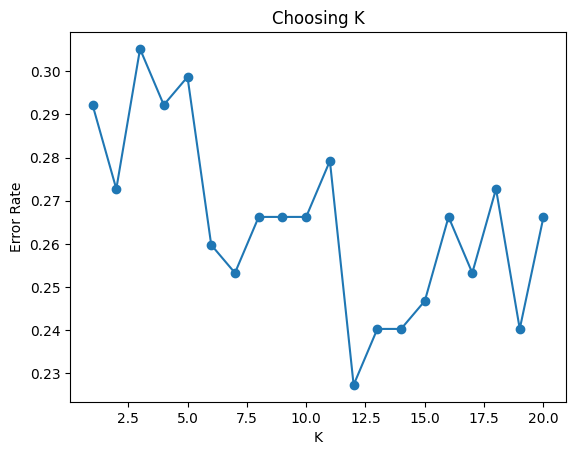

In [41]:
errors = []
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    pred_k = knn.predict(X_test_scaled)
    errors.append(1 - accuracy_score(y_test, pred_k))

plt.plot(range(1, 21), errors, marker='o')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.title('Choosing K')
plt.show()

In [44]:
model_knn = KNeighborsClassifier(n_neighbors=11)
model_knn.fit(X_train_scaled, y_train)
pred_knn = model_knn.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, pred_knn))
print(classification_report(y_test, pred_knn))

Accuracy: 0.7207792207792207
              precision    recall  f1-score   support

           0       0.78      0.80      0.79       100
           1       0.61      0.57      0.59        54

    accuracy                           0.72       154
   macro avg       0.69      0.69      0.69       154
weighted avg       0.72      0.72      0.72       154



# **Decision Tree**

Accuracy: 0.8051948051948052
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       100
           1       0.75      0.67      0.71        54

    accuracy                           0.81       154
   macro avg       0.79      0.77      0.78       154
weighted avg       0.80      0.81      0.80       154



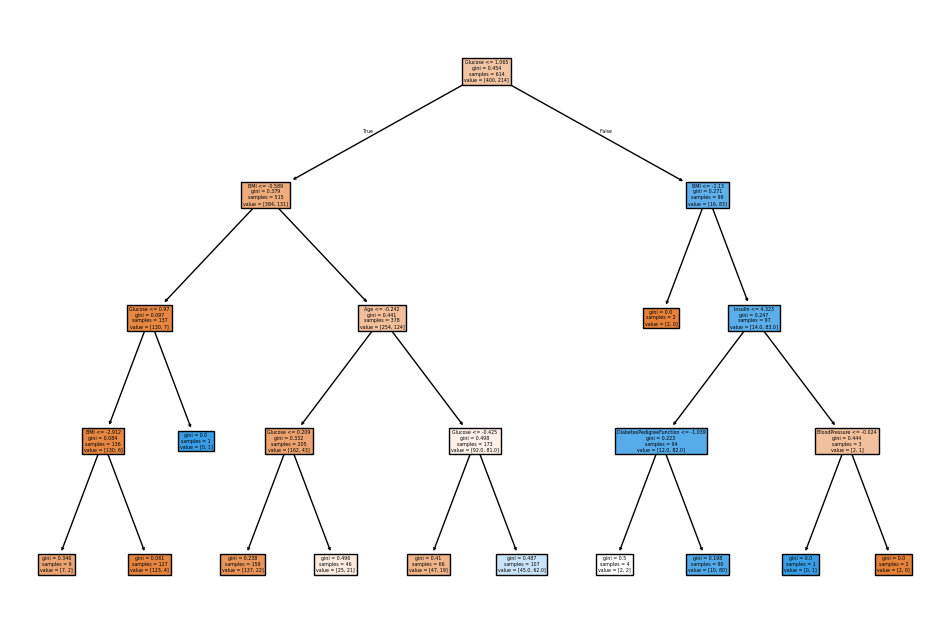

In [46]:
model_tree = DecisionTreeClassifier(max_depth=4)
model_tree.fit(X_train_scaled, y_train)
pred_tree = model_tree.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, pred_tree))
print(classification_report(y_test, pred_tree))

# Visualize Tree
plt.figure(figsize=(12,8))
plot_tree(model_tree, filled=True, feature_names=data.drop(columns=["Outcome"]).columns.tolist())
plt.show()

# **Random Forest**

In [47]:
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train_scaled, y_train)
pred_rf = model_rf.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, pred_rf))
print(classification_report(y_test, pred_rf))

Accuracy: 0.7597402597402597
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       100
           1       0.68      0.59      0.63        54

    accuracy                           0.76       154
   macro avg       0.74      0.72      0.73       154
weighted avg       0.75      0.76      0.76       154



# ***6.Comparison***

In [48]:
## 📊 Comparison

models = ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest']
accuracies = [accuracy_score(y_test, pred_log),
              accuracy_score(y_test, pred_knn),
              accuracy_score(y_test, pred_tree),
              accuracy_score(y_test, pred_rf)]

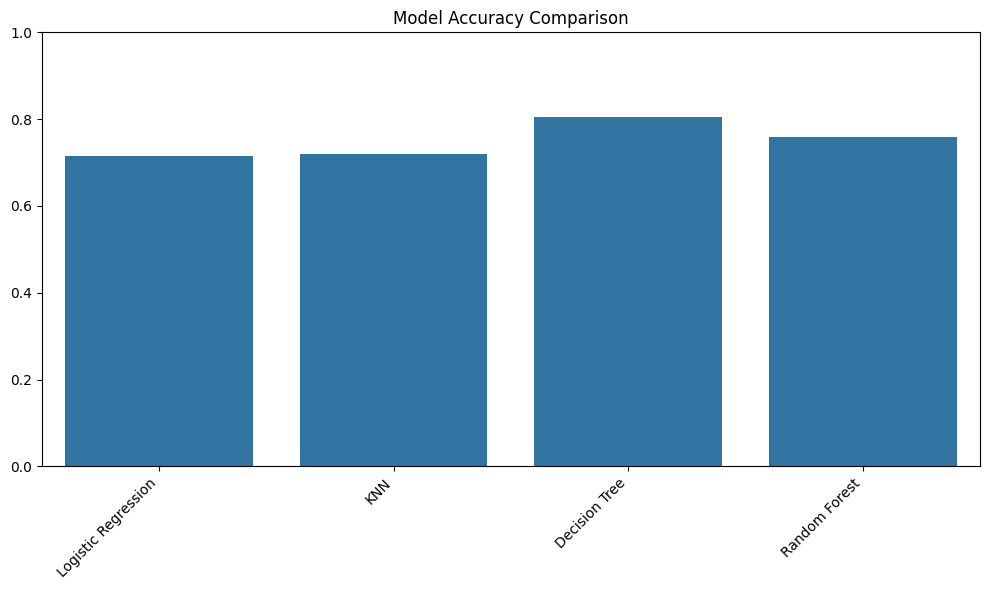

In [49]:
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies)
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# ***7.Evaluate using: Confusion Matrix***

In [53]:
# Evaluate using Confusion Matrix and Classification Report

# Create a dictionary of trained models and their predictions
results = {
    'Logistic Regression': (model_log, pred_log),
    'KNN': (model_knn, pred_knn),
    'Decision Tree': (model_tree, pred_tree),
    'Random Forest': (model_rf, pred_rf)
}

for name, (model, y_pred) in results.items():
    cm = confusion_matrix(y_test, y_pred)
    print(f"\n🔍 Confusion Matrix for {name}:")
    print(cm)
    print(classification_report(y_test, y_pred))


🔍 Confusion Matrix for Logistic Regression:
[[82 18]
 [26 28]]
              precision    recall  f1-score   support

           0       0.76      0.82      0.79       100
           1       0.61      0.52      0.56        54

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.71      0.71      0.71       154


🔍 Confusion Matrix for KNN:
[[80 20]
 [23 31]]
              precision    recall  f1-score   support

           0       0.78      0.80      0.79       100
           1       0.61      0.57      0.59        54

    accuracy                           0.72       154
   macro avg       0.69      0.69      0.69       154
weighted avg       0.72      0.72      0.72       154


🔍 Confusion Matrix for Decision Tree:
[[88 12]
 [18 36]]
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       100
           1       0.75      0.67      0.71        54

    accuracy

# ***8.ROC Curve & AUC***

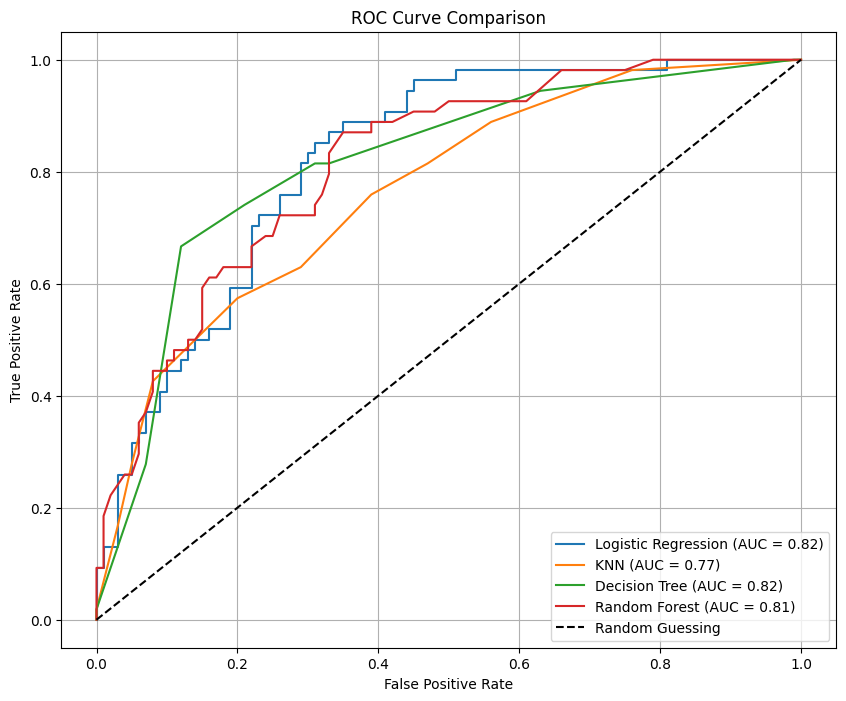

In [54]:
from sklearn.metrics import roc_curve, roc_auc_score

# Create a figure for the ROC curves
plt.figure(figsize=(10, 8))

# Define models and their corresponding predictions/probabilities
models_and_preds = {
    'Logistic Regression': (model_log, model_log.predict_proba(X_test_scaled)[:, 1]),
    'KNN': (model_knn, model_knn.predict_proba(X_test_scaled)[:, 1]),
    'Decision Tree': (model_tree, model_tree.predict_proba(X_test_scaled)[:, 1]),
    'Random Forest': (model_rf, model_rf.predict_proba(X_test_scaled)[:, 1])
}

for name, (model, y_pred_proba) in models_and_preds.items():
    # Calculate ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')

# Plot the random guessing line
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')

# Add labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid(True)
plt.show()